<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week07_CH07_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%93%AC%EA%B8%B0/week07_CH07_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8B%A4%EB%93%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH07 데이터 다듬기

날짜: 4월 28일 월요일

In [1]:
from google.colab import drive
drive.mount('/content/Drive/')

Mounted at /content/Drive/


데이터 정보 확인하기

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47676 (\N{HANGUL SYLLABLE MEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

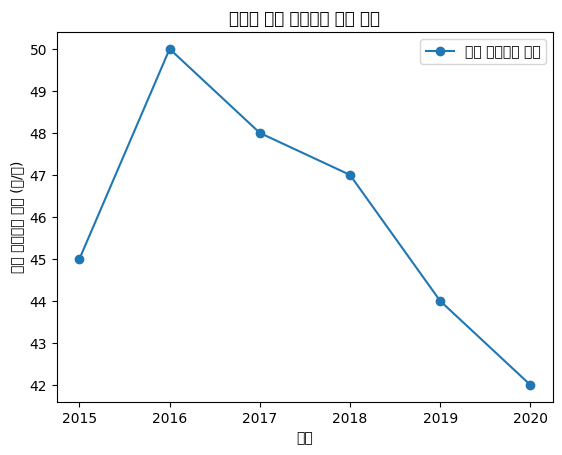

In [3]:
import matplotlib.pyplot as plt

# 데이터 (예시)
years = [2015, 2016, 2017, 2018, 2019, 2020]
pm10_values = [45, 50, 48, 47, 44, 42]  # 평균 미세먼지 농도 (가상의 수치)

# 선그래프 그리기
plt.plot(years, pm10_values, marker='o', linestyle='-', label='평균 미세먼지 농도')

# 제목과 축 이름 추가
plt.title('연도별 평균 미세먼지 농도 변화')
plt.xlabel('연도')
plt.ylabel('평균 미세먼지 농도 (㎍/㎥)')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()


데이터 결측치 확인하기

In [4]:
import pandas as pd
import numpy as np

# 8행 3열짜리 데이터프레임 생성 (랜덤값)
df = pd.DataFrame(np.random.randn(8, 3), columns=['C1', 'C2', 'C3'])

# 특정 위치에 결측치(NaN) 삽입
df.loc[2, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan

# 결측치 확인 (칼럼별 결측치 개수 합산)
print(df.isnull().sum())


C1    0
C2    2
C3    0
dtype: int64


수치 데이터 요약 통계 describe()

In [5]:
import pandas as pd
import numpy as np

# 데이터 생성
data = {
    '학번': range(2000, 2010),
    '성적': [85, 95, 75, 70, 100, 100, 95, 85, 80, 85],
    '전공': ['컴퓨터공학', '컴퓨터공학', '화학공학', '기계공학',
             '전자공학', '수학교육', '건축공학', '항공시스템공학',
             '컴퓨터공학', np.nan]  # 마지막 전공에 결측치 있음
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '학번' 컬럼을 문자형(object)으로 변환
df = df.astype({'학번': 'object'})

# 수치형 데이터 요약 통계량 확인
print(df.describe())


               성적
count   10.000000
mean    87.000000
std     10.327956
min     70.000000
25%     81.250000
50%     85.000000
75%     95.000000
max    100.000000


문자열 데이터 요약 통계 describe(include = 'object' )

In [6]:
import pandas as pd
import numpy as np

# 데이터 생성
data = {
    '학번': range(2000, 2010),
    '성적': [85, 95, 75, 70, 100, 100, 95, 85, 80, 85],
    '전공': ['컴퓨터공학', '컴퓨터공학', '화학공학', '기계공학',
             '전자공학', '수학교육', '건축공학', '항공시스템공학',
             '컴퓨터공학', np.nan]  # 마지막 전공에 결측치(np.nan) 포함
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '학번' 컬럼을 문자열(object) 타입으로 변환
df = df.astype({'학번': 'object'})

# 문자열 타입(object) 컬럼에 대한 요약 통계량 확인
print(df.describe(include='object'))


          학번     전공
count     10      9
unique    10      7
top     2000  컴퓨터공학
freq       1      3


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


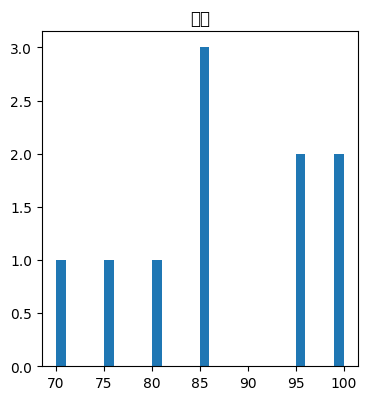

In [11]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

박스플롯으로 이상치 확인하기

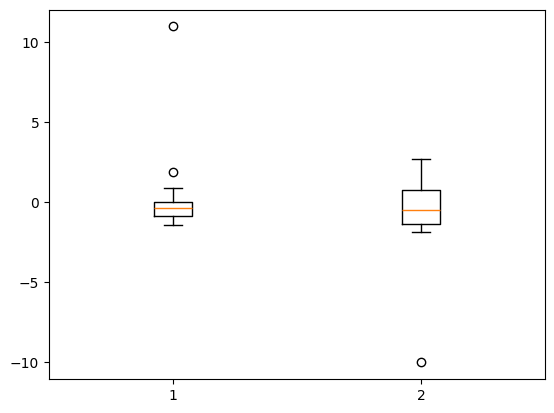

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 20행 3열짜리 랜덤 데이터프레임 생성
df = pd.DataFrame(np.random.randn(20, 3), columns=['C1', 'C2', 'C3'])

# 일부 데이터 이상치로 변경
df.loc[1, 'C1'] = 11    # 1번째 행, 'C1' 컬럼에 11 입력
df.loc[3, 'C3'] = -10   # 3번째 행, 'C3' 컬럼에 -10 입력

# 박스플롯으로 이상치 확인
plt.boxplot([df['C1'], df['C3']])
plt.show()


### 7-3 전처리 방법

##### (1) 데이터 타입의 변환

In [13]:
import pandas as pd

# 데이터프레임 생성
d = pd.DataFrame({
    'date': ['2020-01-03', '2021-11-22', '2023-01-05'],
    'name': ['J', 'Y', 'O']
})

# 'date' 컬럼을 datetime 타입으로 변환
d['date'] = pd.to_datetime(d['date'], format='%Y-%m-%d')

# 데이터프레임 출력
d


,date,name
0,2020-01-03,J
1,2021-11-22,Y
2,2023-01-05,O


##### (2) 결측치 처리

수치형 데이터의 경우 평균, 중앙값 등 대푯값으로 대체할 수 있음

In [18]:
import pandas as pd
import numpy as np

# 15행 3열짜리 랜덤 데이터프레임 생성
df = pd.DataFrame(np.random.randn(15, 3), columns=['C1', 'C2', 'C3'])

# 일부 데이터에 결측치(NaN) 삽입
df.loc[1, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan

# 결측치를 0으로 대체
df = df.fillna(0)

# 결과 출력
df


,C1,C2,C3
0,-0.369457,-1.634325,0.726064
1,1.288408,0.000000,-0.498047
2,0.778368,-0.723919,2.273781
3,0.770621,0.000000,-0.160930
4,1.250680,0.265553,1.504807
5,0.507023,-1.239238,-2.047337
6,-0.300525,1.328164,0.078910
7,-0.539575,-0.302656,-0.167313
8,0.439423,-3.039148,-1.401245
9,-0.884236,2.247904,-0.625024


카테고리 데이터의 경우 mode()를 사용하여 최빈값으로 대체할 수 있음

In [19]:
import pandas as pd
import numpy as np

# 8행 3열짜리 랜덤 데이터프레임 생성
df = pd.DataFrame(np.random.randn(8, 3), columns=['C1', 'C2', 'C3'])

# 일부 데이터에 결측치(NaN) 삽입
df.loc[2, 'C2'] = np.nan
df.loc[3, 'C2'] = np.nan

# 원본 데이터프레임 출력
df

# 결측치를 각 컬럼의 평균값으로 채운 새로운 데이터프레임 생성
df2 = df.fillna(df.mean())

# 결과 출력
df2


,C1,C2,C3
0,0.913755,0.085201,0.574742
1,1.498032,-0.206510,0.537301
2,-0.105955,0.269952,-0.971023
3,0.479915,0.269952,0.308005
4,-0.303690,-0.549864,-1.908859
5,-0.169575,0.948383,0.297390
6,2.306646,2.146475,1.711399
7,0.463883,-0.803973,0.130767


샘플수가 많은 경우 결측치가 발생한 행을 모두 삭제할 수 있음

In [20]:
import pandas as pd
import numpy as np

# 데이터 생성
data = {
    '학번': range(2000, 2010),
    '성적': [85, 95, 75, 70, 100, 100, 95, 85, 80, 85],
    '전공': ['컴퓨터공학', np.nan, np.nan, '기계공학',
           '전자공학', '수학교육', '건축공학', '항공시스템공학',
           '컴퓨터공학', np.nan]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 결측치(NaN)가 있는 행 제거
df = df.dropna()

# 결과 출력
df


,학번,성적,전공
0,2000,85,컴퓨터공학
3,2003,70,기계공학
4,2004,100,전자공학
5,2005,100,수학교육
6,2006,95,건축공학
7,2007,85,항공시스템공학
8,2008,80,컴퓨터공학


##### (3) 이상치 처리
정규분포를 가정하고 양끝의 데이터를 이상치로 판정한 후 제거할 수 있음

### 7-4 제로콜라와 기온 속성 간에는 관련이 있을까?

##### (1) 데이터 불러오기

In [21]:
import pandas as pd
df=pd.read_csv('/content/Drive/MyDrive/data/기온과제로콜라.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       366 non-null    object 
 1   제로콜라     366 non-null    int64  
 2   평균기온(℃)  366 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


##### (2) 데이터속성 설명

In [22]:
df.head()

,날짜,제로콜라,평균기온(℃)
0,2021-09-21,37,22.0
1,2021-09-22,64,20.2
2,2021-09-23,71,20.9
3,2021-09-24,58,21.8
4,2021-09-25,53,21.2


##### (3) 결측치 확인

In [23]:
df.isnull().sum()

,0
날짜,0
제로콜라,0
평균기온(℃),0


##### (4) 요약 통계값 확인

In [24]:
df.describe()
# 수치형 칼럼에 대해서만 나옴

,제로콜라,평균기온(℃)
count,366.000000,366.000000
mean,42.185792,13.575956
std,16.697253,10.760973
min,6.000000,-12.100000
25%,31.000000,5.025000
50%,44.000000,14.700000
75%,54.000000,22.875000
max,100.000000,30.900000


##### (5) 전처리하기

In [25]:
df = df.dropna(axis=0)
df.isnull().sum()

,0
날짜,0
제로콜라,0
평균기온(℃),0


##### (6) 시각화로 표현

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

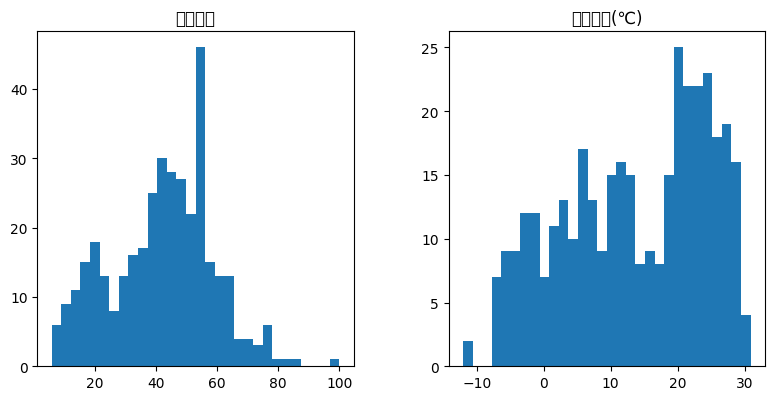

In [26]:
df.hist(figsize=(20,10), grid=  False, layout=(2,4), bins=30)
plt.show()

pairplot()으로 각 속성의 관계 확인하기

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) m

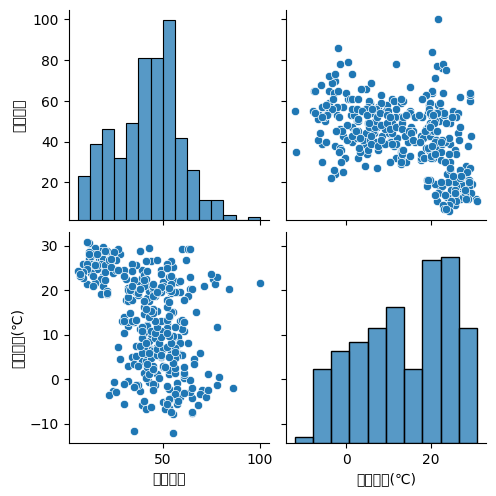

In [28]:
num_features=df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])

##### (7) 상관관계 확인하기

In [31]:
print(df.columns)

Index(['날짜', '제로콜라', '평균기온(℃)'], dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr

<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) mi

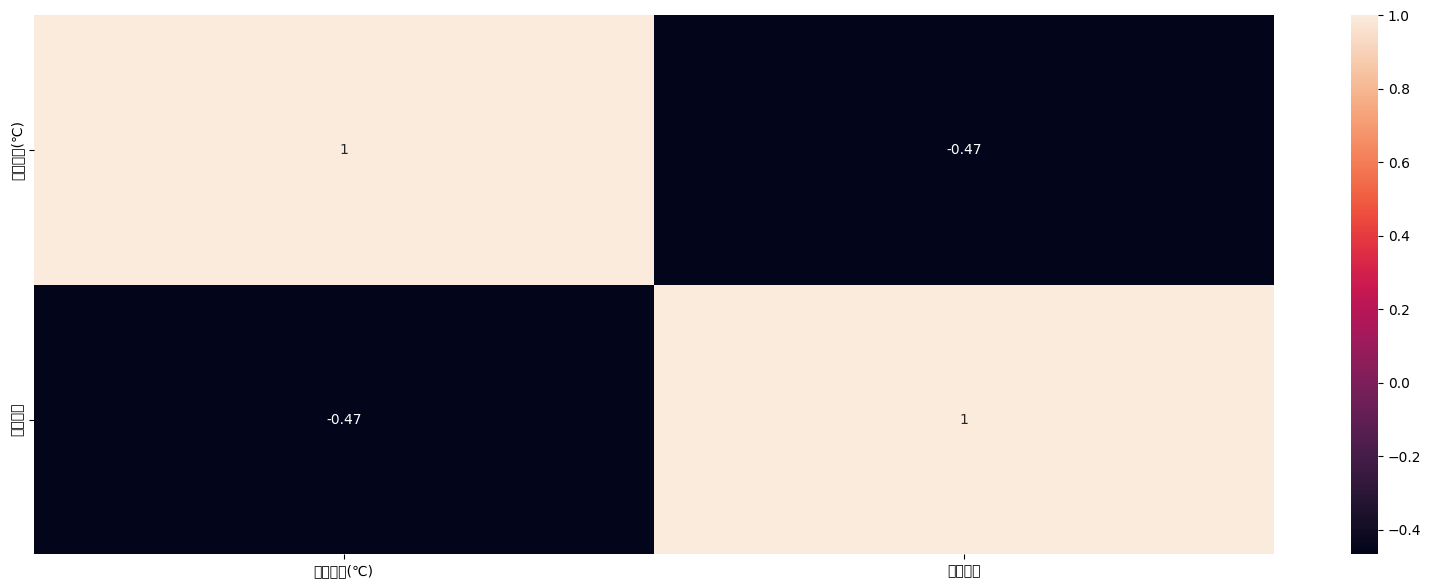

In [33]:
plt.figure(figsize=(20,7))
sns.heatmap(df[['평균기온(℃)', '제로콜라']].corr(), annot=True)

### 7-5 데이터탐색과 전처리 실습

- 전복의 나이를 확인하기 위해 껍질을 원뿔 모양으로 자르고, 염색하고, 현미경으로 고리의 수를 세어 확인해야 한다. 이렇게 진행하려면 너무나도 많은 시간이 필요하다. 더 쉽게 나이를 예측하기 위해 전복의 특성이 담긴 데이터를 이용하고자 한다. 전복의 특성이 담긴 데이터들을 머신러닝에 사용할 수 있도록 다듬어보자

##### (1) 데이터 불러오기

In [34]:
import pandas as pd
df=pd.read_csv('/content/Drive/MyDrive/data/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


##### (2) 데이터 속성 설명

##### (3) 원본 데이터 관찰하기 - 결측치 확인

In [35]:
df.isnull().sum() # 널값존재x

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


##### (4) 요약통계값 확인

In [36]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [37]:
df.mode() # 최빈값 확인

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


• 이상치 제거 : 통계량에서 두께가 0인 것보다 큰 값으로만 데이터를 추출하여 이상치 제거

In [38]:
df=df[df.Height>0]
df.Height.min()

0.01

-  나이테 수(Rings)에 따른 전복 개수 확인

In [39]:
df.groupby('Rings').count()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115
6,258,258,258,258,258,258,258,258
7,391,391,391,391,391,391,391,391
8,567,567,567,567,567,567,567,567
9,689,689,689,689,689,689,689,689


- 나이테 수(Ring)에 따른 순살의 평균 무게 확인

In [42]:
df.groupby('Rings')[['Shucked weight']].mean()

,Shucked weight
Rings,
1,0.001000
2,0.004500
3,0.011767
4,0.024719
5,0.061696
6,0.123413
7,0.182657
8,0.293927
9,0.387938


- 나이테 수에 따른 전체 무게(Whole weight)와 껍질 무게(Shell weight) 확인하기

- 껍질 무게가 가장 많이 나가는 나이테 수는 27
- 나이테 수가 작을수록 껍질 무게도 적어짐
- 전체 무게 또한 나이테 수가 작을수록 0에 가깝고, 나이테 수가 크면 1을 넘음

In [43]:
df.groupby('Rings')[['Shucked weight', 'Whole weight', 'Shell weight']].mean()

,Shucked weight,Whole weight,Shell weight
Rings,,,
1,0.001000,0.002000,0.001500
2,0.004500,0.015000,0.005000
3,0.011767,0.028400,0.008933
4,0.024719,0.059605,0.018000
5,0.061696,0.125500,0.036770
6,0.123413,0.273713,0.077333
7,0.182657,0.397386,0.111648
8,0.293927,0.641128,0.178721
9,0.387938,0.852013,0.236509


##### (5) 시각화로 표현

• 히스토그램으로 속성별 분포 확인

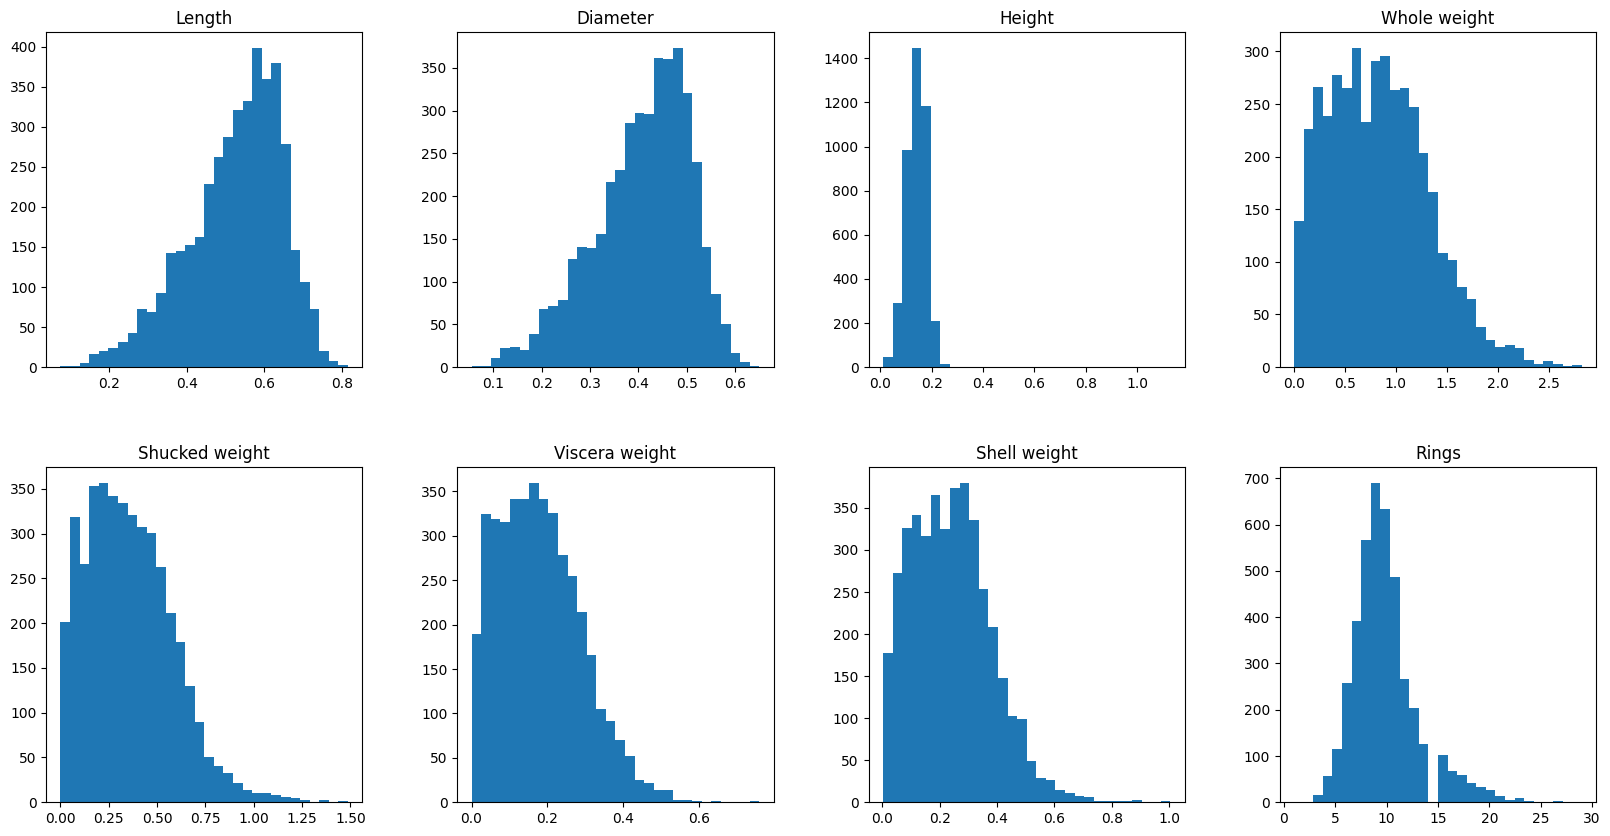

In [44]:
df.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

- countplot()으로 성별에 따른 데이터 분포 확인
- ㅣ는 유아

<ipython-input-45-f48e199ab8b3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette="Set3")


<Axes: xlabel='Sex', ylabel='count'>

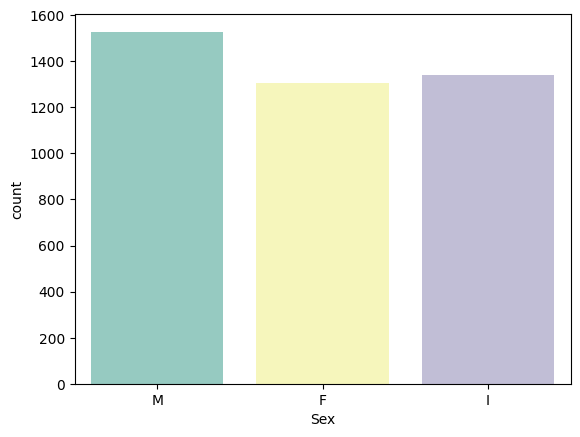

In [45]:
sns.countplot(x='Sex', data=df, palette="Set3")

-  swarmplot()과 violinplot()으로 성별에 따른 나이 분포 확인

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Sex', ylabel='Rings'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


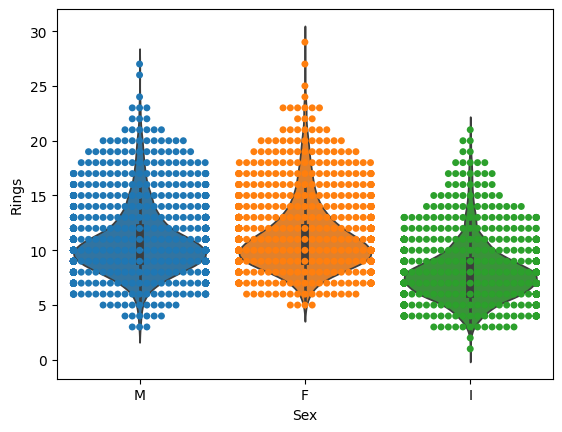

In [46]:
plt.figsize=(20,7)
sns.swarmplot(x='Sex', y='Rings', data=df, hue='Sex')
sns.violinplot(x='Sex', y='Rings', data=df, hue='Sex')

##### (6) --